In [28]:
using Pkg
Pkg.activate(".")
using RidePooling
RP = RidePooling
using RidePooling_eval
EV = RidePooling_eval
using Plots
using LaTeXStrings
gr()

  Activating project at `~/ridepooling_simulations`


Plots.GRBackend()

In [29]:
name = "./Playing field/drive_and_wait/anywt1_1066.model"


"./Playing field/drive_and_wait/anywt1_1066.model"

In [30]:
Δ = 0.05
A = 0
B = 1
bins = A:Δ:B
print()

In [31]:
path = "./Playing field/"
rejections = ["anywt1", "anywt035"]
dt_types = ["resubmission", "drive_and_wait"]
colors = [:teal, :green, :orange, :violet, :brown]
paretoParams = [:served, :delay]
nomen = Dict(["resubmission" => "resub",
    "drive_and_wait" => "d&w",
    "anywt1" => L"t_{wait} = 1",
    "anywt035" => L"t_{wait} = 0.35",
    :served => "served percentage " * L"p_{served}",
    :total_time => "Total time " * L"t_{total}",
    :cooldown_time => "Cooldown time" * L"\tau"])

Dict{Any, AbstractString} with 7 entries:
  "anywt035"       => L"$t_{wait} = 0.35$"
  :cooldown_time   => "Cooldown time\$\\tau\$"
  "resubmission"   => "resub"
  "anywt1"         => L"$t_{wait} = 1$"
  :total_time      => "Total time \$t_{total}\$"
  :served          => "served percentage \$p_{served}\$"
  "drive_and_wait" => "d&w"

In [32]:
indexes = [1126,]
my_plots = []
for index in indexes
    plot()
    c = 1

    for dt_type in dt_types
        for re in rejections
            name = path * "/" * dt_type * "/" * re * "_$index.model"
            request_bins = [[] for bin in bins]
            model = RP.loadmodel(name)

            requests = model.requests
            for req in requests
                dt = req.dt_earliest_pickup

                i = trunc(Int, dt / Δ) + 1
                if i <= length(request_bins)
                    push!(request_bins[i], req)
                end
            end
            y = [EV.quantity(:served, reqs) for reqs in request_bins]
            label = nomen[dt_type] * " " * nomen[re]
            plot!(bins, y, color=colors[c], label=label, legend=:bottomright)

            c += 1
        end
    end
    
    append!(my_plots, [plot!()])
end


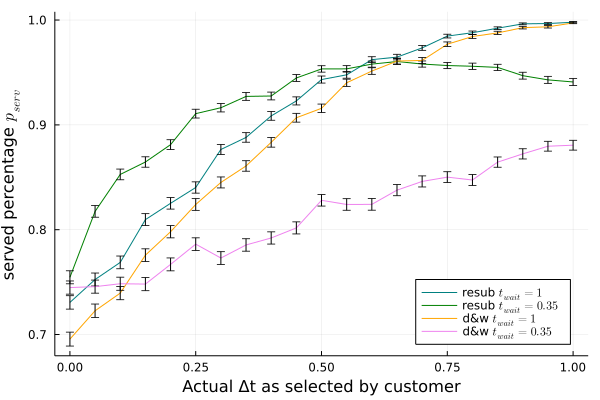

In [33]:
plot(my_plots..., layout = (3, 1))
xlabel!("Actual Δt as selected by customer")
ylabel!("served percentage " * L"p_{serv}")

In [34]:
savefig("figures/pserv_act_dt.pdf")

In [35]:
path = "./Playing field/"
rejections = ["anywt1", "anywt035"]
dt_types = ["resubmission", "drive_and_wait"]
colors = [:teal, :blue, :orange, :violet, :brown]
params = [:waiting_time]
nomen = Dict(["resubmission" => "resub",
    "drive_and_wait" => "d&w",
    "anywt1" => L"t_{wait} = 1",
    "anywt035" => L"t_{wait} = 0.35",
    :served => "served percentage " * L"p_{served}",
    :total_time => "Total time " * L"t_{total}",
    :cooldown_time => "Cooldown time" * L"\tau",
    :waiting_time => "Waiting Time"* L"\tau_{wait}"])

Dict{Any, AbstractString} with 8 entries:
  "anywt035"       => L"$t_{wait} = 0.35$"
  :cooldown_time   => "Cooldown time\$\\tau\$"
  "resubmission"   => "resub"
  "anywt1"         => L"$t_{wait} = 1$"
  :total_time      => "Total time \$t_{total}\$"
  :waiting_time    => "Waiting Time\$\\tau_{wait}\$"
  :served          => "served percentage \$p_{served}\$"
  "drive_and_wait" => "d&w"

In [36]:
indexes = [1126,]
my_plots = []
paretoParams = [:waiting_time, :delay]

for index in indexes
    plot()
    c = 1

    for dt_type in dt_types
        for re in rejections
            name = path * "/" * dt_type * "/" * re * "_$index.model"
            request_bins = [[] for bin in bins]
            model = RP.loadmodel(name)

            requests = model.requests
            for req in requests
                dt = req.dt_earliest_pickup

                i = trunc(Int, dt / Δ) + 1
                if i <= length(request_bins)
                    push!(request_bins[i], req)
                end
            end
            y = [EV.quantity(params[1], reqs) for reqs in request_bins]
            label = nomen[dt_type] * " " * nomen[re]
            plot!(bins, y, color=colors[c], label=label, legend=:right)

            c += 1
        end
    end
    
    append!(my_plots, [plot!()])
end


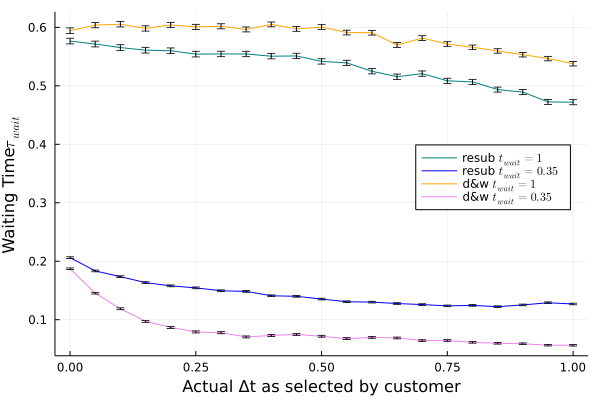

In [37]:
plot(my_plots..., layout = (3, 1))
xlabel!("Actual Δt as selected by customer")
ylabel!(nomen[params[1]])

In [38]:
savefig("figures/waiting_time_act_dt.pdf")

In [39]:
indexes = [1126,]
my_plots = []
paretoParams = [:waiting_time, :delay]

for index in indexes
    plot()
    c = 1

    for dt_type in dt_types
        for re in rejections
            name = path * "/" * dt_type * "/" * re * "_$index.model"
            request_bins = [[] for bin in bins]
            model = RP.loadmodel(name)

            requests = model.requests
            for req in requests
                dt = req.dt_earliest_pickup

                i = trunc(Int, dt / Δ) + 1
                if i <= length(request_bins)
                    push!(request_bins[i], req)
                end
            end
            y = [EV.quantity(:total_time, reqs) for reqs in request_bins]
            label = nomen[dt_type] * " " * nomen[re]
            plot!(bins, y, color=colors[c], label=label, legend=:right)

            c += 1
        end
    end
    
    append!(my_plots, [plot!()])
end


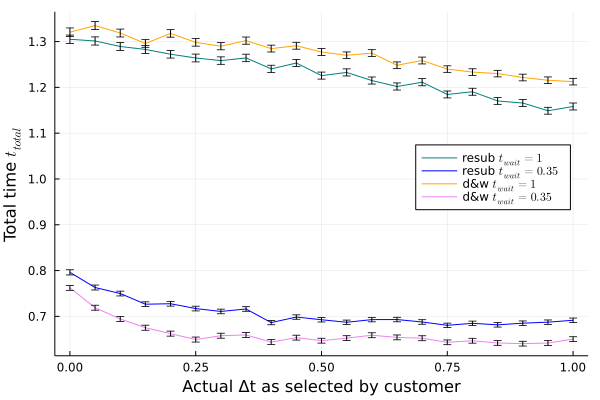

In [40]:
plot(my_plots..., layout = (3, 1))
xlabel!("Actual Δt as selected by customer")
ylabel!(nomen[:total_time])

In [41]:
savefig("figures/total_time_act_dt.pdf")

In [ ]:
name = "Playing field/resubmission/standart.model"
model = RP.loadmodel(name)
mean(:served, model)


0.00081

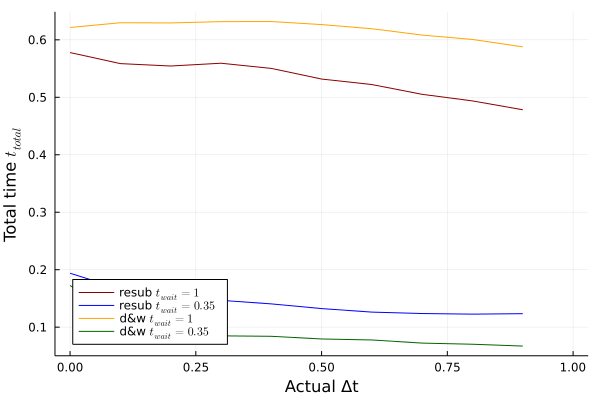

In [ ]:
plot()
c = 1
index = 1066
for dt_type in dt_types
    for re in rejections
        name = path * "/" * dt_type * "/" * re * "_$index.model"
        request_bins = [[] for bin in bins]
        model = RP.loadmodel(name)

        requests = model.requests
        for req in requests
            dt = req.dt_earliest_pickup

            i = trunc(Int, dt / Δ) + 1
            if i <= length(request_bins)
                push!(request_bins[i], req)
            end
        end
        y = [mean(:waiting_time, reqs) for reqs in request_bins]
        label = nomen[dt_type] * " " * nomen[re]
        plot!(bins, y, color=colors[c], label=label, legend=:bottomleft)

        c += 1
    end
end
xlabel!("Actual Δt")
ylabel!(nomen[:total_time])


2.0